<a href="https://colab.research.google.com/github/Shirshadas24/Deep-Learning-notebooks/blob/main/Spam_RNN_LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [ ]:
df['v1'].replace({'ham':0,'spam':1},inplace=True)

<ipython-input-5-c7b63ddb6ddb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['v1'].replace({'ham':0,'spam':1},inplace=True)
<ipython-input-5-c7b63ddb6ddb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['v1'].replace({'ham':0,'spam':1},inplace=True)


In [ ]:
df.head(10)

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense,Dropout,LSTM,GRU

In [ ]:
X = df["v2"].values
y = df["v1"].values


In [ ]:

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)

X_sequences = tokenizer.texts_to_sequences(X)


vocab_size = len(tokenizer.word_index) + 1

max_length = max(len(seq) for seq in X_sequences)
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding="post")

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16, input_length=max_length),
    SimpleRNN(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])


model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.4810 - loss: 0.6936 - val_accuracy: 0.8646 - val_loss: 0.6906
Epoch 2/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4981 - loss: 0.6932 - val_accuracy: 0.1345 - val_loss: 0.7019
Epoch 3/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5045 - loss: 0.6934 - val_accuracy: 0.8655 - val_loss: 0.6875
Epoch 4/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4939 - loss: 0.6933 - val_accuracy: 0.8655 - val_loss: 0.6924
Epoch 5/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5068 - loss: 0.6932 - val_accuracy: 0.8646 - val_loss: 0.6911


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8760 - loss: 0.3784


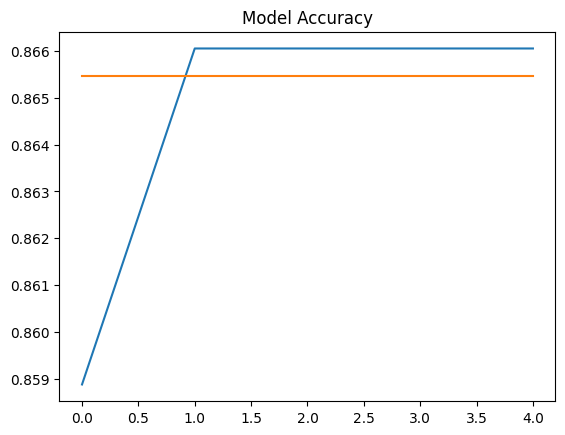

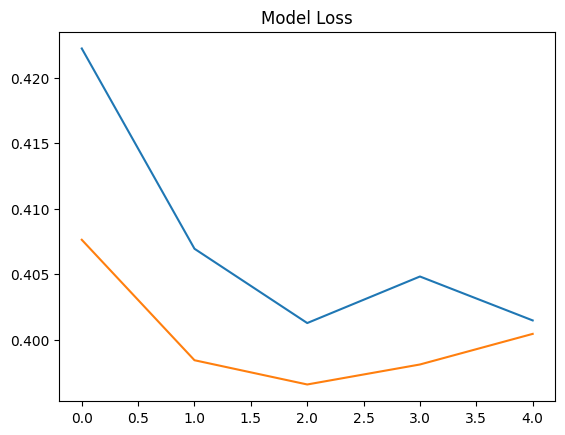

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')

plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')

plt.show()

# LSTM

In [ ]:
model_lstm= Sequential([
    Embedding(input_dim=vocab_size, output_dim=256, input_length=max_length),
    LSTM(128, activation="tanh",return_sequences=False),
    Dropout(0.1),
    Dense(1, activation="sigmoid")
])
model_lstm.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


history_lstm = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5030 - loss: 0.6941 - val_accuracy: 0.1354 - val_loss: 0.7008
Epoch 2/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.4909 - loss: 0.6938 - val_accuracy: 0.8655 - val_loss: 0.6883
Epoch 3/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5062 - loss: 0.6934 - val_accuracy: 0.8655 - val_loss: 0.6707
Epoch 4/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.4930 - loss: 0.6935 - val_accuracy: 0.1345 - val_loss: 0.7106
Epoch 5/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5102 - loss: 0.6936 - val_accuracy: 0.8655 - val_loss: 0.6658
Epoch 6/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4975 - loss: 0.6938 - val_accuracy: 0.8655 - val_loss: 0.6842
Epoch 7/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4965 - loss: 0.6936 - val_accuracy: 0.8655 - val_loss: 0.6841
Epoch 8/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5049 - loss: 0.6934 - val_accuracy: 0.865

# GRU

In [ ]:
model_gru = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    GRU(128, activation="tanh", return_sequences=False),
    Dropout(0.1),
    Dense(1, activation="sigmoid")
])

model_gru.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


history_gru = model_gru.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5055 - loss: 0.6952 - val_accuracy: 0.1345 - val_loss: 0.7117
Epoch 2/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4914 - loss: 0.6939 - val_accuracy: 0.1345 - val_loss: 0.7035
Epoch 3/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4865 - loss: 0.6937 - val_accuracy: 0.1345 - val_loss: 0.7271
Epoch 4/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4848 - loss: 0.6944 - val_accuracy: 0.1345 - val_loss: 0.6999
Epoch 5/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.4944 - loss: 0.6934 - val_accuracy: 0.1345 - val_loss: 0.7049
Epoch 6/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5071 - loss: 0.6933 - val_accuracy: 0.1345 - val_loss: 0.6980
Epoch 7/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5030 - loss: 0.6933 - val_accuracy: 0.8655 - val_loss: 0.6907
Epoch 8/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4916 - loss: 0.6935 - val_accuracy: 0.865

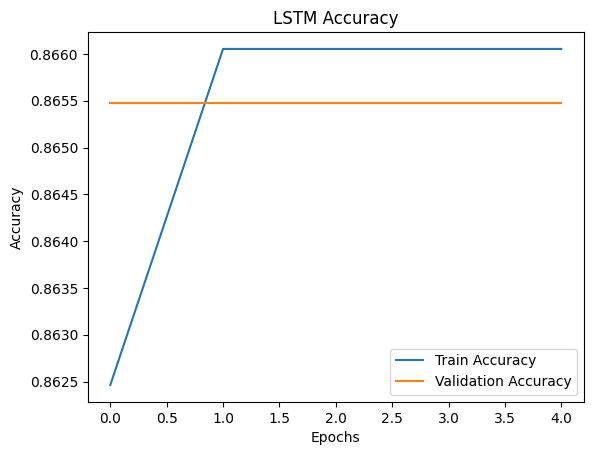

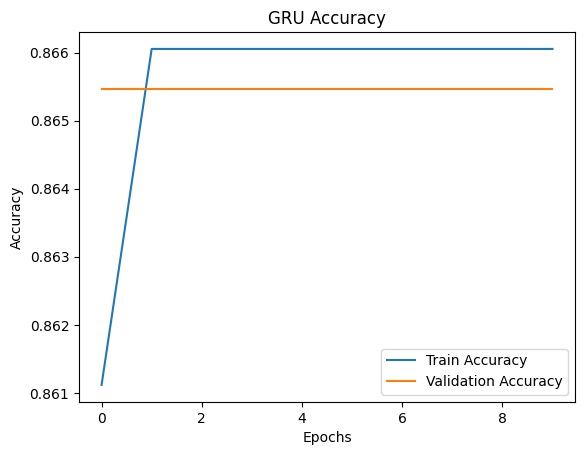

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curves(history, title):
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

plot_learning_curves(history_lstm, "LSTM Accuracy")
plot_learning_curves(history_gru, "GRU Accuracy")


In [ ]:
def predict_spam(message):
    sequence = tokenizer.texts_to_sequences([message])
    padded = pad_sequences(sequence, maxlen=max_length, padding="post")
    prediction = model_lstm.predict(padded)[0][0]
    return "Spam" if prediction > 0.7 else "Ham"

print(predict_spam("Free entry in 2 a wkly comp to win FA Cup"))
print(predict_spam("Hi, how are you?"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Ham


In [ ]:
sample_texts = ["Congratulations! You won a lottery.", "Hello, how are you?","Free entry in 2 a wkly comp to win FA Cup","Good night love"]
sample_sequences = tokenizer.texts_to_sequences(sample_texts)
sample_padded = pad_sequences(sample_sequences, maxlen=max_length, padding="post")

predictions = model_lstm.predict(sample_padded)

for text, pred in zip(sample_texts, predictions):
    print(f"Message: {text} → Prediction Score: {pred[0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Message: Congratulations! You won a lottery. → Prediction Score: 0.4870
Message: Hello, how are you? → Prediction Score: 0.4870
Message: Free entry in 2 a wkly comp to win FA Cup → Prediction Score: 0.4870
Message: Good night love → Prediction Score: 0.4870


In [ ]:
import numpy as np
spam_count = np.sum(y_train)
ham_count = len(y_train) - spam_count

print(f"Spam: {spam_count}, Ham: {ham_count}")


Spam: 597, Ham: 3860


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
